# Entity Data Science Final Project 
# Honey vs Agricultural Commodity Production 
## Nic Acosta
7/2022

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression

1. Does honey production correlate with the production of any other USDA commodities in your category/group? Which are more highly correlated? 
2. Have the production levels of each commodity in your category changed over time? - Linear Modeling / MANCOVA
 3. Other relevant / interesting findings about your category

 pulling in libraries

 Pulling in and printing data csv

In [2]:
USDAHoney2 = pd.read_csv(r'\Users\airos\Downloads\USDAHoney2.csv', low_memory=False)
print(USDAHoney2)

      Unnamed: 0   Commodity_Description Country_Code   Country_Name  Year  \
0              1  Almonds, Shelled Basis           US  United States  1998   
1              2  Almonds, Shelled Basis           US  United States  1999   
2              3  Almonds, Shelled Basis           US  United States  2000   
3              4  Almonds, Shelled Basis           US  United States  2001   
4              5  Almonds, Shelled Basis           US  United States  2002   
...          ...                     ...          ...            ...   ...   
8308        8309                   Honey           US  United States  2008   
8309        8310                   Honey           US  United States  2009   
8310        8311                   Honey           US  United States  2010   
8311        8312                   Honey           US  United States  2011   
8312        8313                   Honey           US  United States  2012   

     Attribute_Description Unit_Description         Value  Cate

.

sorted the columns into rows to view

.

In [3]:
for col_name in USDAHoney2.columns:
    print(col_name)

Unnamed: 0
Commodity_Description
Country_Code
Country_Name
Year
Attribute_Description
Unit_Description
Value
Category


.

Going through each column to see unique input values

.

In [4]:
USDAHoney2.Country_Code.unique()

array(['US'], dtype=object)

In [5]:
USDAHoney2.Commodity_Description.unique()

array(['Almonds, Shelled Basis', 'Animal Numbers, Cattle',
       'Animal Numbers, Swine', 'Apple Juice, Concentrated',
       'Apples, Fresh', 'Asparagus, Fresh', 'Avocados, Fresh', 'Barley',
       'Citrus, Other, Fresh', 'Coffee, Green', 'Corn', 'Cotton',
       'Dairy, Butter', 'Dairy, Cheese', 'Dairy, Dry Whole Milk Powder',
       'Dairy, Milk, Fluid', 'Dairy, Milk, Nonfat Dry',
       'Filberts, Inshell Basis', 'Fresh Apricots',
       'Fresh Cherries,(Sweet&Sour)', 'Fresh Peaches & Nectarines',
       'Fresh Plums & Prunes', 'Grapefruit, Fresh',
       'Grapes, Table, Fresh', 'Kiwifruit', 'Lemons, Fresh',
       'Macadamia, Inshell Basis', 'Meal, Cottonseed', 'Meal, Fish',
       'Meal, Peanut', 'Meal, Rapeseed', 'Meal, Soybean',
       'Meal, Sunflowerseed', 'Meat, Beef and Veal', 'Meat, Swine',
       'Oats', 'Oil, Coconut', 'Oil, Cottonseed', 'Oil, Olive',
       'Oil, Palm', 'Oil, Palm Kernel', 'Oil, Peanut', 'Oil, Rapeseed',
       'Oil, Soybean', 'Oil, Sunflowerseed', 'Oi

In [6]:
USDAHoney2.Country_Name.unique()

array(['United States'], dtype=object)

In [7]:
USDAHoney2.Attribute_Description.unique()

array(['Production'], dtype=object)

In [8]:
USDAHoney2.Unit_Description.unique()

array(['(MT)', '(1000 HEAD)', '(1000 MT)', '(1000 60 KG BAGS)',
       '1000 480 lb. Bales', '(1000 MT CWE)', '(MT, Net Weight)',
       '(MIL PCS)', 'MT'], dtype=object)

In [9]:
USDAHoney2.Value.unique()

array([235884.     , 361362.     , 303700.     , ...,  79511.60546,
        66768.90159,  63914.00613])

In [10]:
USDAHoney2.Category.unique()

array([4, 1, 2, 3, 5, 6], dtype=int64)

In [11]:
TrimmedUSDAHoney2 = USDAHoney2.drop(['Unnamed: 0', 'Country_Name'], axis=1)

In [12]:
for col_name in TrimmedUSDAHoney2.columns:
    print(col_name)

Commodity_Description
Country_Code
Year
Attribute_Description
Unit_Description
Value
Category


.

Dropping anything null and printing the first couple data rows...

.

Changed the Units to Metric Tons

In [13]:
TrimmedUSDAHoney2 = TrimmedUSDAHoney2[TrimmedUSDAHoney2.Unit_Description != '(1000 HEAD)']
TrimmedUSDAHoney2 = TrimmedUSDAHoney2[TrimmedUSDAHoney2.Unit_Description != '(MIL PCS)']
TrimmedUSDAHoney2.loc[TrimmedUSDAHoney2["Unit_Description"] == "(1000 60 KG BAGS)", "Value"] = (TrimmedUSDAHoney2.Value * 1000 * .001 * 60)
TrimmedUSDAHoney2.loc[TrimmedUSDAHoney2["Unit_Description"] == "(1000 60 KG BAGS)", "Unit_Description"] = "(MT)"
TrimmedUSDAHoney2.loc[TrimmedUSDAHoney2["Unit_Description"] == "(MT, Net Weight)", "Unit_Description"] = "(MT)"
TrimmedUSDAHoney2.loc[TrimmedUSDAHoney2["Unit_Description"] == "(1000 MT)", "Value"] = (TrimmedUSDAHoney2.Value * 1000)
TrimmedUSDAHoney2.loc[TrimmedUSDAHoney2["Unit_Description"] == "(1000 MT)", "Unit_Description"] = "(MT)"
TrimmedUSDAHoney2.loc[TrimmedUSDAHoney2["Unit_Description"] == "1000 480 lb. Bales", "Value"] = (TrimmedUSDAHoney2.Value * 1000 * .00045 * 480)
TrimmedUSDAHoney2.loc[TrimmedUSDAHoney2["Unit_Description"] == "1000 480 lb. Bales", "Unit_Description"] = "(MT)"
TrimmedUSDAHoney2.loc[TrimmedUSDAHoney2["Unit_Description"] == "MT", "Unit_Description"] = "(MT)"
TrimmedUSDAHoney2.loc[TrimmedUSDAHoney2["Unit_Description"] == "(1000 MT CWE)", "Value"] = (TrimmedUSDAHoney2.Value * 1000)
TrimmedUSDAHoney2.loc[TrimmedUSDAHoney2["Unit_Description"] == "(1000 MT CWE)", "Unit_Description"] = "(MT)"

In [14]:
TrimmedUSDAHoney2

,Commodity_Description,Country_Code,Year,Attribute_Description,Unit_Description,Value,Category
0,"Almonds, Shelled Basis",US,1998,Production,(MT),235884.00000,4
1,"Almonds, Shelled Basis",US,1999,Production,(MT),361362.00000,4
2,"Almonds, Shelled Basis",US,2000,Production,(MT),303700.00000,4
3,"Almonds, Shelled Basis",US,2001,Production,(MT),376488.00000,4
4,"Almonds, Shelled Basis",US,2002,Production,(MT),494416.00000,4
...,...,...,...,...,...,...,...
8308,Honey,US,2008,Production,(MT),73922.46948,6
8309,Honey,US,2009,Production,(MT),65801.39412,6
8310,Honey,US,2010,Production,(MT),79511.60546,6
8311,Honey,US,2011,Production,(MT),66768.90159,6


In [15]:
TrimmedUSDAHoney2.dropna(inplace=True)
print(TrimmedUSDAHoney2.head())

    Commodity_Description Country_Code  Year Attribute_Description  \
0  Almonds, Shelled Basis           US  1998            Production   
1  Almonds, Shelled Basis           US  1999            Production   
2  Almonds, Shelled Basis           US  2000            Production   
3  Almonds, Shelled Basis           US  2001            Production   
4  Almonds, Shelled Basis           US  2002            Production   

  Unit_Description     Value  Category  
0             (MT)  235884.0         4  
1             (MT)  361362.0         4  
2             (MT)  303700.0         4  
3             (MT)  376488.0         4  
4             (MT)  494416.0         4  


.

Deciding to drop categories 2-5 to remain with dairy and livestock

.

In [16]:
TrimmedUSDAHoney2.set_index("Category", inplace=True)

.

Made category my index so i can drop other commodities beyond my own. livestock and dairy

.

In [17]:
TrimmedUSDAHoney2.head()

,Commodity_Description,Country_Code,Year,Attribute_Description,Unit_Description,Value
Category,,,,,,
4,"Almonds, Shelled Basis",US,1998,Production,(MT),235884.0
4,"Almonds, Shelled Basis",US,1999,Production,(MT),361362.0
4,"Almonds, Shelled Basis",US,2000,Production,(MT),303700.0
4,"Almonds, Shelled Basis",US,2001,Production,(MT),376488.0
4,"Almonds, Shelled Basis",US,2002,Production,(MT),494416.0


In [18]:
TrimmedUSDAHoney2.tail()

,Commodity_Description,Country_Code,Year,Attribute_Description,Unit_Description,Value
Category,,,,,,
6,Honey,US,2008,Production,(MT),73922.46948
6,Honey,US,2009,Production,(MT),65801.39412
6,Honey,US,2010,Production,(MT),79511.60546
6,Honey,US,2011,Production,(MT),66768.90159
6,Honey,US,2012,Production,(MT),63914.00613


.

Dropping other commodities

.

In [19]:
TrimmedUSDAHoney2.drop(4, inplace=True)

In [20]:
TrimmedUSDAHoney2.drop(2, inplace=True)

In [21]:
TrimmedUSDAHoney2.drop(3, inplace=True)

In [22]:
TrimmedUSDAHoney2.drop(5, inplace=True)

.

Making sure it worked.

.

In [23]:
print(TrimmedUSDAHoney2.to_string(index=True))

                 Commodity_Description Country_Code  Year Attribute_Description Unit_Description         Value
Category                                                                                                      
1                        Dairy, Butter           US  1998            Production             (MT)  5.300000e+05
1                        Dairy, Butter           US  1999            Production             (MT)  5.790000e+05
1                        Dairy, Butter           US  2000            Production             (MT)  5.700000e+05
1                        Dairy, Butter           US  2001            Production             (MT)  5.590000e+05
1                        Dairy, Butter           US  2002            Production             (MT)  6.150000e+05
1                        Dairy, Butter           US  2003            Production             (MT)  5.630000e+05
1                        Dairy, Butter           US  2004            Production             (MT)  5.670000e+05
1

.

It did!

.

Pick the maximum values for each commodity 1,6, and drop te repetitive entries.

In [24]:
Cat1 = TrimmedUSDAHoney2.groupby(['Commodity_Description','Year'], as_index=False).agg(max)
Cat1

,Commodity_Description,Year,Country_Code,Attribute_Description,Unit_Description,Value
0,"Dairy, Butter",1998,US,Production,(MT),530000.0
1,"Dairy, Butter",1999,US,Production,(MT),579000.0
2,"Dairy, Butter",2000,US,Production,(MT),570000.0
3,"Dairy, Butter",2001,US,Production,(MT),559000.0
4,"Dairy, Butter",2002,US,Production,(MT),615000.0
...,...,...,...,...,...,...
159,"Poultry, Meat, Turkey",2008,US,Production,(MT),2801000.0
160,"Poultry, Meat, Turkey",2009,US,Production,(MT),2733000.0
161,"Poultry, Meat, Turkey",2010,US,Production,(MT),2607000.0
162,"Poultry, Meat, Turkey",2011,US,Production,(MT),2593000.0


In [25]:
for col_name in Cat1.Commodity_Description.unique():
    print(col_name)

Dairy, Butter
Dairy, Cheese
Dairy, Dry Whole Milk Powder
Dairy, Milk, Fluid
Dairy, Milk, Nonfat Dry
Honey
Meat, Beef and Veal
Meat, Chicken
Meat, Swine
Poultry, Meat, Broiler
Poultry, Meat, Turkey


.

Dropping values for multicolinearity. (dairy butter, dairy cheese, dry whole milk powder, milk nonfat dry) 

.

In [26]:
# Cat1 = Cat1[Cat1.Commodity_Description == 'Dairy, Butter','Dairy, Cheese','Dairy, Dry Whole Milk Powder','Dairy, Milk, Nonfat Dry' ]

In [27]:
Cat1 = Cat1[Cat1.Commodity_Description != 'Dairy, Butter']

In [28]:
Cat1 = Cat1[Cat1.Commodity_Description !='Dairy, Cheese']

In [29]:
Cat1 = Cat1[Cat1.Commodity_Description !='Dairy, Dry Whole Milk Powder']

In [30]:
Cat1 = Cat1[Cat1.Commodity_Description !='Dairy, Milk, Nonfat Dry']

In [31]:
for col_name in Cat1.Commodity_Description.unique():
    print(col_name)

Dairy, Milk, Fluid
Honey
Meat, Beef and Veal
Meat, Chicken
Meat, Swine
Poultry, Meat, Broiler
Poultry, Meat, Turkey


.

Compare the numbers of poultry meat chicken vs broiler (maybe drop one)

.

In [32]:
Compare = Cat1.loc[((Cat1['Commodity_Description']=='Meat, Chicken') | (Cat1['Commodity_Description']=='Poultry, Meat, Broiler'))]
Compare

,Commodity_Description,Year,Country_Code,Attribute_Description,Unit_Description,Value
105,"Meat, Chicken",1999,US,Production,(MT),13618000.0
106,"Meat, Chicken",2000,US,Production,(MT),13943000.0
107,"Meat, Chicken",2001,US,Production,(MT),14267000.0
108,"Meat, Chicken",2002,US,Production,(MT),14715000.0
109,"Meat, Chicken",2003,US,Production,(MT),14924000.0
110,"Meat, Chicken",2004,US,Production,(MT),15514000.0
111,"Meat, Chicken",2005,US,Production,(MT),16104000.0
112,"Meat, Chicken",2006,US,Production,(MT),16159000.0
113,"Meat, Chicken",2007,US,Production,(MT),16452000.0
114,"Meat, Chicken",2008,US,Production,(MT),16815000.0


In [33]:
abc = (Cat1[Cat1.Year == 2004])

.

Dropping Broiler

.

In [34]:
Cat1 = Cat1[Cat1.Commodity_Description != 'Poultry, Meat, Broiler']
Cat1

,Commodity_Description,Year,Country_Code,Attribute_Description,Unit_Description,Value
45,"Dairy, Milk, Fluid",1998,US,Production,(MT),71334000.0
46,"Dairy, Milk, Fluid",1999,US,Production,(MT),73750000.0
47,"Dairy, Milk, Fluid",2000,US,Production,(MT),75929000.0
48,"Dairy, Milk, Fluid",2001,US,Production,(MT),74994000.0
49,"Dairy, Milk, Fluid",2002,US,Production,(MT),77140000.0
...,...,...,...,...,...,...
159,"Poultry, Meat, Turkey",2008,US,Production,(MT),2801000.0
160,"Poultry, Meat, Turkey",2009,US,Production,(MT),2733000.0
161,"Poultry, Meat, Turkey",2010,US,Production,(MT),2607000.0
162,"Poultry, Meat, Turkey",2011,US,Production,(MT),2593000.0


In [35]:
for col_name in Cat1.Commodity_Description.unique():
    print(col_name)

Dairy, Milk, Fluid
Honey
Meat, Beef and Veal
Meat, Chicken
Meat, Swine
Poultry, Meat, Turkey


In [36]:
# Cat1.to_csv('Cat1.csv')

.

Dropping columns to leave Honey,year and other commodities

.

In [37]:
Cat1.drop('Attribute_Description', inplace=True, axis=1)
Cat1.drop('Unit_Description', inplace=True, axis=1)
Cat1

,Commodity_Description,Year,Country_Code,Value
45,"Dairy, Milk, Fluid",1998,US,71334000.0
46,"Dairy, Milk, Fluid",1999,US,73750000.0
47,"Dairy, Milk, Fluid",2000,US,75929000.0
48,"Dairy, Milk, Fluid",2001,US,74994000.0
49,"Dairy, Milk, Fluid",2002,US,77140000.0
...,...,...,...,...
159,"Poultry, Meat, Turkey",2008,US,2801000.0
160,"Poultry, Meat, Turkey",2009,US,2733000.0
161,"Poultry, Meat, Turkey",2010,US,2607000.0
162,"Poultry, Meat, Turkey",2011,US,2593000.0


.

Reshaping the df for the correlation matrix

.

In [38]:
Cat1Pivot = Cat1.pivot(index='Year', columns='Commodity_Description', values='Value')\
            .reset_index()
Cat1Pivot.columns.name=None
print(Cat1Pivot)

    Year  Dairy, Milk, Fluid        Honey  Meat, Beef and Veal  Meat, Chicken  \
0   1998          71334000.0  99571.62321           11804000.0            NaN   
1   1999          73750000.0  91800.71933           12124000.0     13618000.0   
2   2000          75929000.0  99589.31322           12298000.0     13943000.0   
3   2001          74994000.0  84253.43532           11983000.0     14267000.0   
4   2002          77140000.0  77684.09135           12427000.0     14715000.0   
5   2003          77290000.0  82268.52548           12039000.0     14924000.0   
6   2004          77535000.0  82884.04711           11261000.0     15514000.0   
7   2005          80286000.0  78910.59871           11318000.0     16104000.0   
8   2006          82582000.0  69960.81442           11981000.0     16159000.0   
9   2007          84211000.0  66959.40939           12168000.0     16452000.0   
10  2008          86410000.0  73922.46948           12226000.0     16815000.0   
11  2009          86817000.0

In [39]:
# Cat1Pivot.to_csv('Cat1Pivot.csv')

.

Correlation

.

In [40]:
corrMatrix = Cat1Pivot.corr()
print (corrMatrix)

                           Year  Dairy, Milk, Fluid     Honey  \
Year                   1.000000            0.988032 -0.868987   
Dairy, Milk, Fluid     0.988032            1.000000 -0.853603   
Honey                 -0.868987           -0.853603  1.000000   
Meat, Beef and Veal   -0.004616            0.107295 -0.070536   
Meat, Chicken          0.951986            0.927079 -0.827380   
Meat, Swine            0.948936            0.959340 -0.834067   
Poultry, Meat, Turkey  0.799770            0.832400 -0.808096   

                       Meat, Beef and Veal  Meat, Chicken  Meat, Swine  \
Year                             -0.004616       0.951986     0.948936   
Dairy, Milk, Fluid                0.107295       0.927079     0.959340   
Honey                            -0.070536      -0.827380    -0.834067   
Meat, Beef and Veal               1.000000      -0.186852     0.071269   
Meat, Chicken                    -0.186852       1.000000     0.921237   
Meat, Swine                       0

In [41]:
corrMatrix

,Year,"Dairy, Milk, Fluid",Honey,"Meat, Beef and Veal","Meat, Chicken","Meat, Swine","Poultry, Meat, Turkey"
Year,1.000000,0.988032,-0.868987,-0.004616,0.951986,0.948936,0.799770
"Dairy, Milk, Fluid",0.988032,1.000000,-0.853603,0.107295,0.927079,0.959340,0.832400
Honey,-0.868987,-0.853603,1.000000,-0.070536,-0.827380,-0.834067,-0.808096
"Meat, Beef and Veal",-0.004616,0.107295,-0.070536,1.000000,-0.186852,0.071269,0.367574
"Meat, Chicken",0.951986,0.927079,-0.827380,-0.186852,1.000000,0.921237,0.746910
"Meat, Swine",0.948936,0.959340,-0.834067,0.071269,0.921237,1.000000,0.883935
"Poultry, Meat, Turkey",0.799770,0.832400,-0.808096,0.367574,0.746910,0.883935,1.000000


# INTERPRETATION

### 1. Does honey production correlate with the production of any other USDA commodities in your category/group? 
### 2. Which are more highly correlated? - Correlation

.

As we can see from the correlation matrix, Honey does present a highly negative correlation with 
Year,
Dairy,
Chicken,
Swine(pork),
and Turkey.




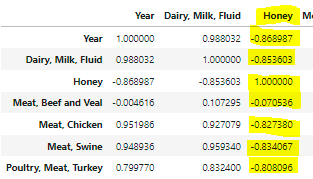

.

### 3. Have the production levels of each commodity in your category changed over time? - Linear Modeling / MANCOVA
### 4. Other relevant / interesting findings about your category?

When running a pair plot to analyze the existing relationships of the commodities with Honey we can see that most present a linear relationship to explore over time.

.

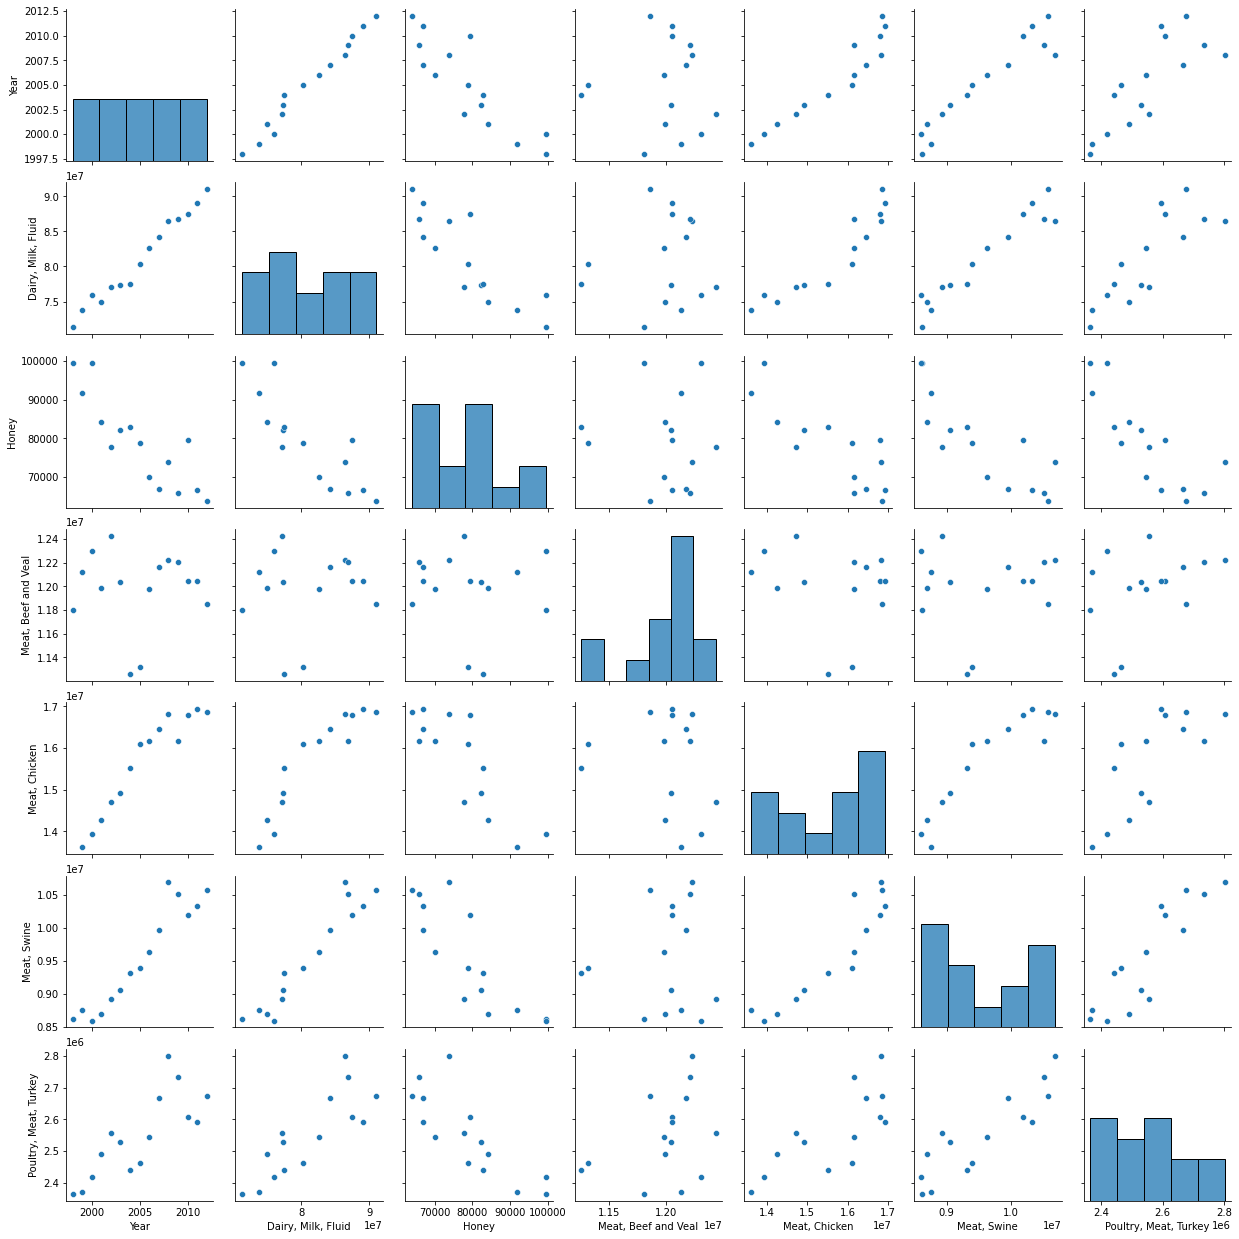

In [42]:
sns.pairplot(Cat1Pivot)

.

When we plot out the distribution and density of the production of these commodities over time:

.

C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

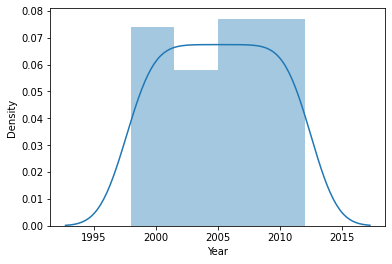

In [43]:
sns.distplot(Cat1['Year'])

.

### Linear regression

### splitting dairy, and meat  to prep for LR

In [44]:
Dairy = Cat1Pivot[[ 'Dairy, Milk, Fluid', 'Year','Honey']]
Dairy

,"Dairy, Milk, Fluid",Year,Honey
0,71334000.0,1998,99571.62321
1,73750000.0,1999,91800.71933
2,75929000.0,2000,99589.31322
3,74994000.0,2001,84253.43532
4,77140000.0,2002,77684.09135
5,77290000.0,2003,82268.52548
6,77535000.0,2004,82884.04711
7,80286000.0,2005,78910.59871
8,82582000.0,2006,69960.81442
9,84211000.0,2007,66959.40939


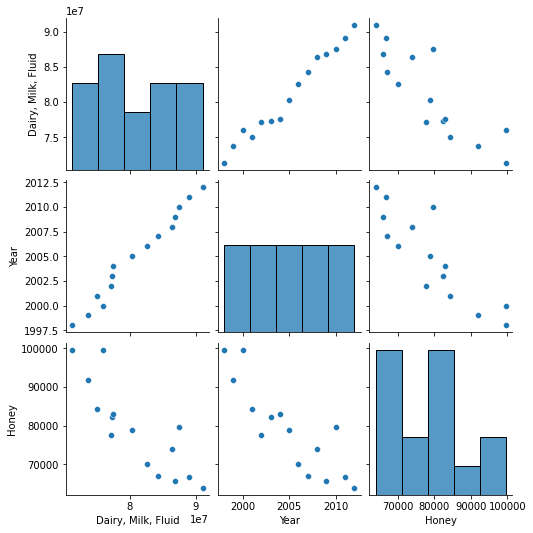

In [45]:
sns.pairplot(Dairy)

C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Dairy, Milk, Fluid', ylabel='Density'>

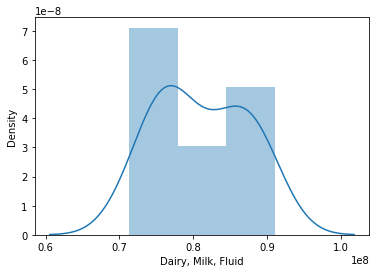

In [47]:
sns.distplot(Dairy['Dairy, Milk, Fluid'])

In [48]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import boxcox
import warnings
warnings.filterwarnings('ignore')

In [50]:
x1 = Dairy['Honey']
y = Dairy['Dairy, Milk, Fluid']

In [69]:
x = sm.add_constant(x1)
model = sm.OLS(y,x).fit()
model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Dairy, Milk, Fluid   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     34.91
Date:                Tue, 19 Jul 2022   Prob (F-statistic):           5.17e-05
Time:                        22:57:45   Log-Likelihood:                -245.49
No. Observations:                  15   AIC:                             495.0
Df Residuals:                      13   BIC:                             496.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.17e+08   6.14e+06     19.053      0.000    1.04e+08     1.3e+08
Honey       -455.0467     77.020     -5.908      0.000    -621.438    -288.656
==============================================================================
Omnibus:                        1.449   Durbin-Watson:                   1.475
Prob(Omnibus):                  0.485   Jarque-Bera (JB):                1.163
Skew:                           0.600   Prob(JB):                        0.559
Kurtosis:                       2.352   Cond. No.                     5.69e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Dairy (Deq for dairy equation) = -455.0467(Honey)+117000000.0

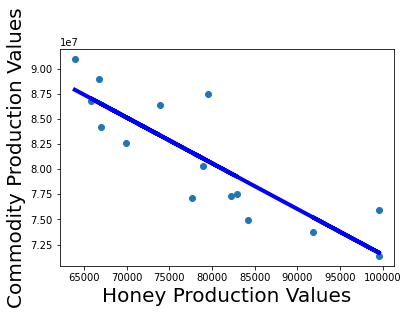

In [53]:
plt.scatter(x1,y)
 
Deq = -455.0467*x1+117000000.0
 
fig = plt.plot(x1,Deq, lw=4, c='blue', label = 'regression line')
 
plt.xlabel('Honey Production Values', fontsize = 20)
 
plt.ylabel('Commodity Production Values', fontsize = 20)
 
plt.show()

### Test for Homoscedasticity

In [56]:
pred_val = model.fittedvalues.copy()
true_val = Dairy['Dairy, Milk, Fluid'].values.copy()
residual = true_val - pred_val

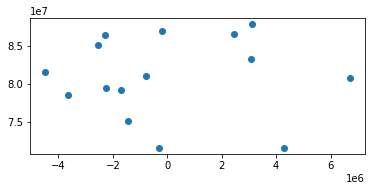

In [57]:
fig, ax = plt.subplots(figsize=(6, 2.5))
_ = ax.scatter(residual, pred_val)

## No homoscedasticity

In [58]:
sms.diagnostic.het_breuschpagan(residual, Dairy[['Dairy, Milk, Fluid']])

(6.578287693727038, nan, 10.93554663979441, 0.005190596949415566)

### 10.936: Is the F value to test for homoscedasticity.statistically significant.
### 0.00052: This is the p value less < .05 (stastically significant), this means we have violated the assumption of homoscedasticity and the data is heteroscedastic. 

In [60]:
sms.linear_harvey_collier(model)

Ttest_1sampResult(statistic=4.646957218799284, pvalue=0.0007085796778785043)

### The p value is less than 0.05, significant, high F value. This is heteroscedastic.

In [70]:
transformedDairy, _ = boxcox(Dairy['Dairy, Milk, Fluid'])

(array([1., 1., 2., 3., 1., 0., 2., 1., 2., 2.]),
 array([4.6190924 , 4.61960793, 4.62012345, 4.62063898, 4.62115451,
        4.62167004, 4.62218556, 4.62270109, 4.62321662, 4.62373214,
        4.62424767]),
 <BarContainer object of 10 artists>)

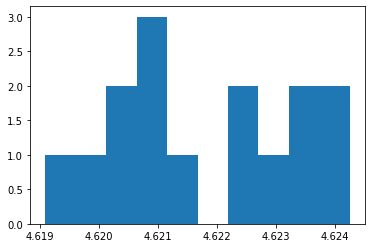

In [71]:
plt.hist(transformedDairy)

### Running a new model for the transformed data in Dairy

In [73]:
y = transformedDairy
TDM = sm.OLS(y,x).fit()

In [75]:
TDM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     37.16
Date:                Tue, 19 Jul 2022   Prob (F-statistic):           3.80e-05
Time:                        23:07:12   Log-Likelihood:                 85.862
No. Observations:                  15   AIC:                            -167.7
Df Residuals:                      13   BIC:                            -166.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6312      0.002   2959.671      0.000       4.628       4.635
Honey      -1.197e-07   1.96e-08     -6.096      0.000   -1.62e-07   -7.73e-08
==============================================================================
Omnibus:                        1.690   Durbin-Watson:                   1.585
Prob(Omnibus):                  0.429   Jarque-Bera (JB):                1.252
Skew:                           0.660   Prob(JB):                        0.535
Kurtosis:                       2.487   Cond. No.                     5.69e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [76]:
sms.linear_harvey_collier(TDM)

Ttest_1sampResult(statistic=4.618542925804385, pvalue=0.000742133279884516)

### Still significant....so transforming the Dairy data did not make the data homoscedastic

# Testing for multicollinearity

In [61]:
Dairy.corr()

,"Dairy, Milk, Fluid",Year,Honey
"Dairy, Milk, Fluid",1.000000,0.988032,-0.853603
Year,0.988032,1.000000,-0.868987
Honey,-0.853603,-0.868987,1.000000


<AxesSubplot:>

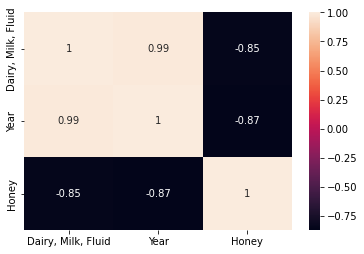

In [62]:
sns.heatmap(Dairy.corr(), annot=True)

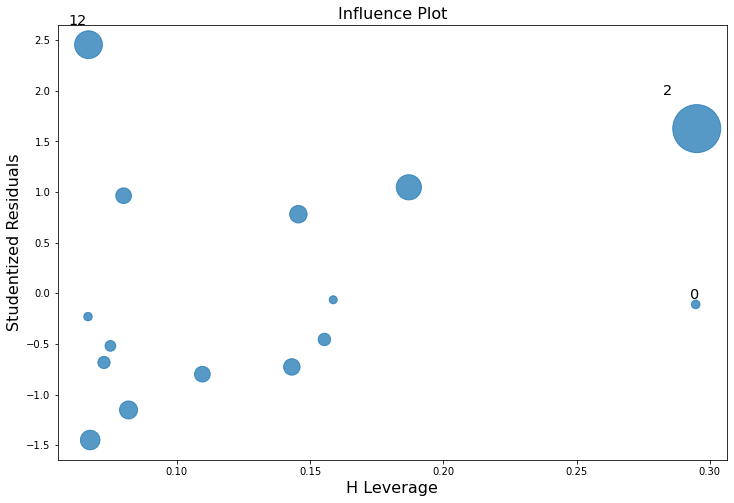

In [63]:
# For outliers
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model, alpha = .05, ax = ax, criterion="cooks")

In [64]:
infl = model.get_influence()
print(infl.summary_frame())

    dfb_const  dfb_Honey   cooks_d  standard_resid  hat_diag  dffits_internal  \
0    0.057474  -0.062855  0.002763       -0.114990  0.294723        -0.074334   
1    0.128510  -0.147933  0.020407       -0.471011  0.155385        -0.202025   
2   -0.845840   0.924958  0.490710        1.531061  0.295114         0.990666   
3    0.103360  -0.148322  0.057754       -1.138090  0.081877        -0.339866   
4   -0.096748   0.042891  0.070060       -1.391483  0.067484        -0.374325   
5    0.028754  -0.054977  0.019098       -0.698185  0.072662        -0.195436   
6    0.029513  -0.049555  0.011623       -0.535167  0.075069        -0.152463   
7   -0.008694   0.000052  0.002052       -0.239724  0.066667        -0.064069   
8   -0.204415   0.175505  0.040445       -0.810699  0.109589        -0.284411   
9   -0.243662   0.217378  0.045878       -0.741054  0.143164        -0.302913   
10   0.151079  -0.115936  0.040499        0.964987  0.080022         0.284602   
11  -0.023737   0.021397  0.

# One outlier , 2 - (student_resid)1.624759  (dfitts)1.051293  

In [65]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Dairy, Milk, Fluid   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     34.91
Date:                Tue, 19 Jul 2022   Prob (F-statistic):           5.17e-05
Time:                        22:48:31   Log-Likelihood:                -245.49
No. Observations:                  15   AIC:                             495.0
Df Residuals:                      13   BIC:                             496.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.17e+08   6.14e+06     19.053      0.000    1.04e+08     1.3e+08
Honey       -455.0467     77.020     -5.908      0.000    -621.438    -288.656
==============================================================================
Omnibus:                        1.449   Durbin-Watson:                   1.475
Prob(Omnibus):                  0.485   Jarque-Bera (JB):                1.163
Skew:                           0.600   Prob(JB):                        0.559
Kurtosis:                       2.352   Cond. No.                     5.69e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###  Adj.R-squared: 0.708 ~ 0.71% of the variance in Dairy production related to Honey.

### P value is not significant with an F Statistic that is quite is large. Because the p value is < .05, you can determine that the Year (or perhaps some event(s) in the years) does have a  significant effect on the production value of Honey. By looking at the R-squared and Adj. R-squared in the upper right hand corner, you see that this model accounts for over 70% (more precisely 73.6%) of the variance in explaining decrease in Honey's production value over time.

Omnibus: This is a test of skew and kurtosis of the residual. You want a value close to zero, which would indicate normality = *1.123

Prob(Omnibus): This is a test indicating the probabilty that residulas are normally distributed. You would like to see a value close to zero here, to inidcate a normal distribution. = *0.570

Skew: Again, you would like to see a value close to zero, and this result feeds into the Omnibus test discussed above. = *0.505

Kurtosis: If you have a value close to zero, this means our data is relatively normal. = *2.699

Durbin-Watson: This also tests for homoscedasticity! You would like a value between 1 and 2, otherwise you have the presence of heteroscedasticity within your data. = *1.985, so close to being heteroscedastic

Jarque-Bera (JB): This also tests skew and kurtosis. It should also be close to zero. = *0.695

Prob (JB): The probabilty that JB is normal. You would like this to be close to zero as well. = *0.706

Condition Number: You would like to see a condition number below 30 or so, because that indicates low multicollinearity. If you have higher than 30, it's time to suspect related variables! =9.30+05

# Now Swine

In [101]:
Swine = Cat1Pivot[[ 'Meat, Swine', 'Year','Honey']]
Swine

,"Meat, Swine",Year,Honey
0,8623000.0,1998,99571.62321
1,8758000.0,1999,91800.71933
2,8596000.0,2000,99589.31322
3,8691000.0,2001,84253.43532
4,8929000.0,2002,77684.09135
5,9056000.0,2003,82268.52548
6,9313000.0,2004,82884.04711
7,9392000.0,2005,78910.59871
8,9632000.0,2006,69960.81442
9,9962000.0,2007,66959.40939


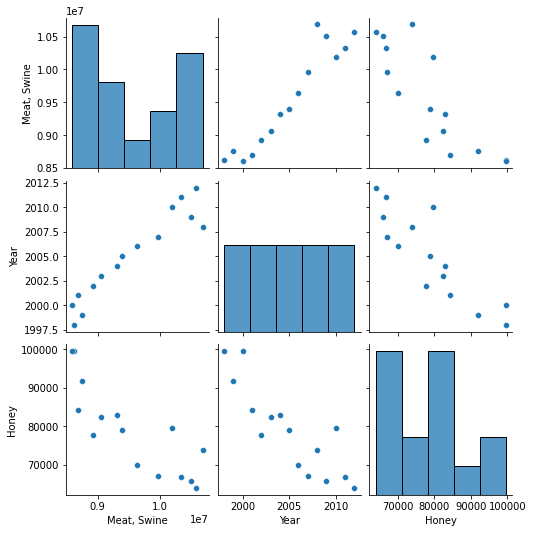

In [80]:
sns.pairplot(Swine)

<AxesSubplot:xlabel='Meat, Swine', ylabel='Density'>

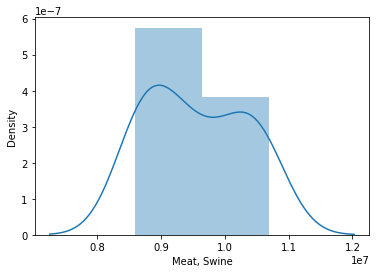

In [81]:
sns.distplot(Swine['Meat, Swine'])

In [82]:
x2 = Swine['Honey']
y2 = Swine['Meat, Swine']

In [84]:
x = sm.add_constant(x2)
model = sm.OLS(y2,x).fit()
model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Meat, Swine   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     29.72
Date:                Tue, 19 Jul 2022   Prob (F-statistic):           0.000111
Time:                        23:21:35   Log-Likelihood:                -215.15
No. Observations:                  15   AIC:                             434.3
Df Residuals:                      13   BIC:                             435.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.393e+07   8.12e+05     17.157      0.000    1.22e+07    1.57e+07
Honey        -55.5376     10.188     -5.451      0.000     -77.547     -33.528
==============================================================================
Omnibus:                        0.511   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.775   Jarque-Bera (JB):                0.362
Skew:                           0.334   Prob(JB):                        0.834
Kurtosis:                       2.635   Cond. No.                     5.69e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Swine (Seq for Swine equation) = -55.5376(Honey)+13930000.0

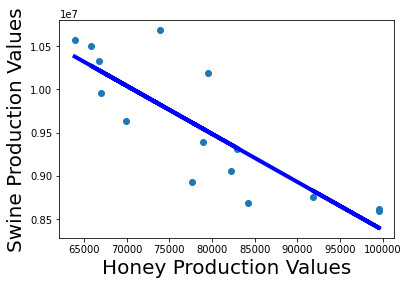

In [87]:
plt.scatter(x2,y2)
 
Seq = -55.5376*x2+13930000.0
 
fig = plt.plot(x2,Seq, lw=4, c='blue', label = 'regression line')
 
plt.xlabel('Honey Production Values', fontsize = 20)
 
plt.ylabel('Swine Production Values', fontsize = 20)
 
plt.show()

### Test for Homoscedasticity

In [89]:
pred_val = model.fittedvalues.copy()
true_val = Swine['Meat, Swine'].values.copy()
residual = true_val - pred_val

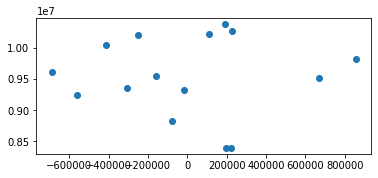

In [90]:
fig, ax = plt.subplots(figsize=(6, 2.5))
_ = ax.scatter(residual, pred_val)

## No homoscedasticity

In [93]:
sms.diagnostic.het_breuschpagan(residual, Swine[['Meat, Swine']])

(5.923066685375449, nan, 9.1355671261408, 0.009134608584867174)

### P value significant at 0.00913, F stat high at 9.1356.

In [95]:
sms.linear_harvey_collier(model)

Ttest_1sampResult(statistic=3.667894021249008, pvalue=0.0037032111649158784)

# Testing for multicollinearity

In [96]:
Swine.corr()

,"Meat, Swine",Year,Honey
"Meat, Swine",1.000000,0.948936,-0.834067
Year,0.948936,1.000000,-0.868987
Honey,-0.834067,-0.868987,1.000000


<AxesSubplot:>

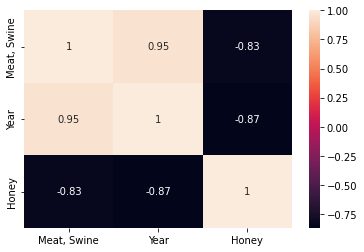

In [97]:
sns.heatmap(Swine.corr(), annot=True)

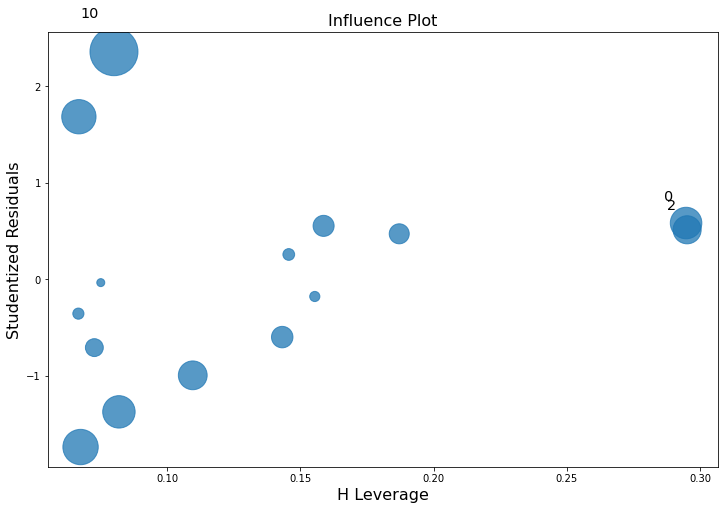

In [98]:
# For outliers
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model, alpha = .05, ax = ax, criterion="cooks")

In [99]:
infl = model.get_influence()
print(infl.summary_frame())

    dfb_const  dfb_Honey   cooks_d  standard_resid  hat_diag  dffits_internal  \
0   -0.302298   0.330598  0.074412        0.596772  0.294723         0.385776   
1    0.050689  -0.058350  0.003221       -0.187137  0.155385        -0.080266   
2   -0.266245   0.291149  0.058050        0.526600  0.295114         0.340734   
3    0.123428  -0.177119  0.079005       -1.331101  0.081877        -0.397504   
4   -0.116216   0.051522  0.094835       -1.618932  0.067484        -0.435511   
5    0.029860  -0.057093  0.020536       -0.723995  0.072662        -0.202661   
6    0.002057  -0.003454  0.000058       -0.037721  0.075069        -0.010746   
7   -0.013475   0.000081  0.004900       -0.370407  0.066667        -0.098995   
8   -0.255038   0.218968  0.061235       -0.997531  0.109589        -0.349956   
9   -0.201327   0.179610  0.031746       -0.616445  0.143164        -0.251978   
10   0.370200  -0.284087  0.179003        2.028752  0.080022         0.598336   
11   0.202536  -0.182568  0.

### Not too shabby with outliers

In [100]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Meat, Swine   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     29.72
Date:                Tue, 19 Jul 2022   Prob (F-statistic):           0.000111
Time:                        23:27:33   Log-Likelihood:                -215.15
No. Observations:                  15   AIC:                             434.3
Df Residuals:                      13   BIC:                             435.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.393e+07   8.12e+05     17.157      0.000    1.22e+07    1.57e+07
Honey        -55.5376     10.188     -5.451      0.000     -77.547     -33.528
==============================================================================
Omnibus:                        0.511   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.775   Jarque-Bera (JB):                0.362
Skew:                           0.334   Prob(JB):                        0.834
Kurtosis:                       2.635   Cond. No.                     5.69e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
### P value is not significant with an F Statistic that is quite is large. Because the p value is < .05, you can determine that the Year (or perhaps some event(s) in the years) does have a  significant effect on the production value of Honey. By looking at the R-squared and Adj. R-squared in the upper right hand corner, you see that this model accounts for over 70% (more precisely 73.6%) of the variance in explaining decrease in Honey's production value over time.

Omnibus: This is a test of skew and kurtosis of the residual. You want a value close to zero, which would indicate normality = *1.123

Prob(Omnibus): This is a test indicating the probabilty that residulas are normally distributed. You would like to see a value close to zero here, to inidcate a normal distribution. = *0.570

Skew: Again, you would like to see a value close to zero, and this result feeds into the Omnibus test discussed above. = *0.505

Kurtosis: If you have a value close to zero, this means our data is relatively normal. = *2.699

Durbin-Watson: This also tests for homoscedasticity! You would like a value between 1 and 2, otherwise you have the presence of heteroscedasticity within your data. = *1.985, so close to being heteroscedastic

Jarque-Bera (JB): This also tests skew and kurtosis. It should also be close to zero. = *0.695

Prob (JB): The probabilty that JB is normal. You would like this to be close to zero as well. = *0.706

Condition Number: You would like to see a condition number below 30 or so, because that indicates low multicollinearity. If you have higher than 30, it's time to suspect related variables! =9.30+05

# Further analysis inquiries

### What influences bee survival - explain negative correlation 3rd variables possibly?
### Does it have an impact how much? or not?

The presence of grazing animals?

Pesticides?

Habitat loss?

An increased number of predatory invaders?

.

# Visuals in Tableau
### Distribution of honey vs Dairy&livestock stuff
### histograms - value
### line graph - value trend over time

line graph done

Histogram done?, Dstribution is the only thing left

.

# Additional Notes for the project
### tableau for visuals

.